In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Documents\Hackathon\IndustriAI\Industry-Baby\Creditscore_train_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Monthly_expense
0,23,Scientist,19114.120,3,4,3,4,3,7.000,4.000,...,809.980,26.823,No,49.575,80.415,High_spent_Small_value_payments,312.494,2,265,1280.349
1,23,Scientist,19114.120,3,4,3,4,5,4.000,4.000,...,809.980,31.378,No,49.575,199.458,Low_spent_Small_value_payments,223.451,2,268,1369.392
2,23,Scientist,19114.120,3,4,3,4,6,31.203,4.000,...,809.980,24.797,No,49.575,41.420,High_spent_Medium_value_payments,341.489,2,269,1251.354
3,23,Scientist,19114.120,3,4,3,4,8,4.000,4.000,...,809.980,27.262,No,49.575,62.430,Low_spent_Small_value_payments,340.479,2,270,1252.364
4,23,Scientist,19114.120,3,4,3,4,3,8.000,4.000,...,809.980,22.538,No,49.575,178.344,Low_spent_Small_value_payments,244.565,2,271,1348.278


In [74]:
df.shape

(92285, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92285 entries, 0 to 92284
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  obj

In [76]:
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

value_cnt(df, 'Credit_Score')  # imbalanced

,Credit_Score,counts,norm_counts
0,1,49293,0.534
1,0,27013,0.293
2,2,15979,0.173


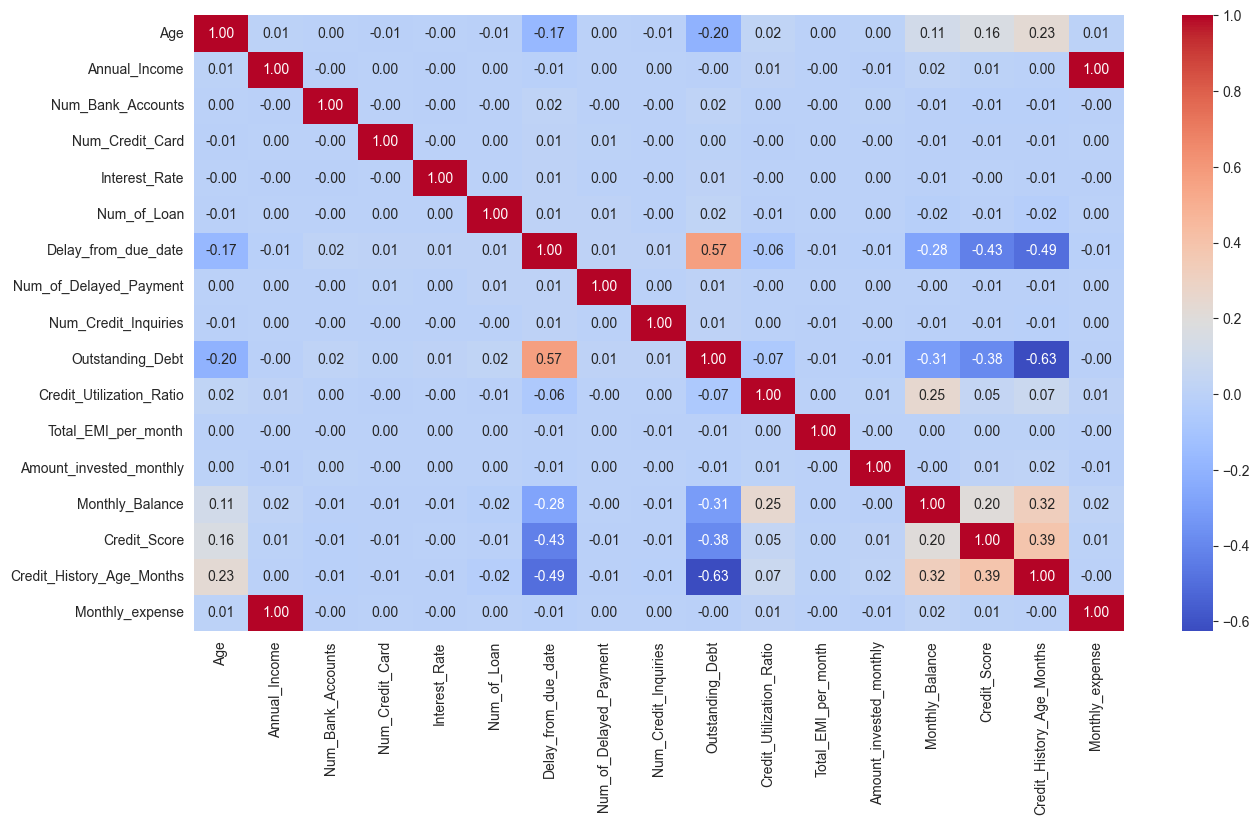

In [77]:
plt.figure(figsize=(15, 8))

sns.heatmap(df.select_dtypes('number').corr(), annot = True, fmt='.2f', cmap= 'coolwarm');

# 3. Data Preprocessing

- Payment_Behaviour    -> ordinal encoding
- Occupation          -> one hot encoding
- Payment_of_Min_Amount    -> one hot encoding
- Credit_Mix     -> one hot encoding
-----------------
- minmax scaling
- imbalanced data - SMOTE

In [78]:
df.select_dtypes('object')

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,Unknown,No,High_spent_Small_value_payments
1,Scientist,Good,No,Low_spent_Small_value_payments
2,Scientist,Good,No,High_spent_Medium_value_payments
3,Scientist,Good,No,Low_spent_Small_value_payments
4,Scientist,Good,No,Low_spent_Small_value_payments
...,...,...,...,...
92280,Mechanic,Unknown,No,High_spent_Large_value_payments
92281,Mechanic,Unknown,No,High_spent_Medium_value_payments
92282,Mechanic,Good,No,High_spent_Large_value_payments
92283,Mechanic,Good,No,Low_spent_Large_value_payments


In [79]:
df.select_dtypes('number')

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Monthly_expense
0,23,19114.120,3,4,3,4,3,7.000,4.000,809.980,26.823,49.575,80.415,312.494,2,265,1280.349
1,23,19114.120,3,4,3,4,5,4.000,4.000,809.980,31.378,49.575,199.458,223.451,2,268,1369.392
2,23,19114.120,3,4,3,4,6,31.203,4.000,809.980,24.797,49.575,41.420,341.489,2,269,1251.354
3,23,19114.120,3,4,3,4,8,4.000,4.000,809.980,27.262,49.575,62.430,340.479,2,270,1252.364
4,23,19114.120,3,4,3,4,3,8.000,4.000,809.980,22.538,49.575,178.344,244.565,2,271,1348.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92280,25,39628.990,4,6,7,2,23,7.000,3.000,502.380,34.664,35.104,60.971,479.866,0,378,2822.550
92281,25,39628.990,4,6,7,2,18,7.000,3.000,502.380,40.566,35.104,54.186,496.652,0,379,2805.764
92282,25,39628.990,4,6,5729,2,27,6.000,3.000,502.380,41.256,35.104,24.028,516.809,0,380,2785.607
92283,25,39628.990,4,6,7,2,20,31.203,3.000,502.380,33.638,35.104,251.673,319.165,1,381,2983.251


## 3.1 Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(['Credit_Score'], axis=1)
y = df['Credit_Score']

seed = 101
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    shuffle=True,
                                                    test_size=0.13,
                                                    random_state=seed)

In [81]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (80287, 20)
y_train shape : (80287,)
X_test shape : (11998, 20)
y_test shape : (11998,)


## 3.2 Encoding

### 3.2.1 Ordinal Encoding 

for 'Payment_Behaviour'

In [82]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

ordinal_encoder = OrdinalEncoder(categories=[order])

X_train['Payment_Behaviour_Encoded'] = ordinal_encoder.fit_transform(X_train[['Payment_Behaviour']])
X_test['Payment_Behaviour_Encoded'] = ordinal_encoder.transform(X_test[['Payment_Behaviour']])

# Drop original column
X_train.drop(['Payment_Behaviour'], axis=1, inplace= True)
X_test.drop(['Payment_Behaviour'], axis=1, inplace= True)

In [83]:
X_train.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Monthly_expense,Payment_Behaviour_Encoded
3432,45,Manager,16718.080,8,10,25,5,61,20.000,6.000,Bad,2931.990,33.372,Yes,41.409,116.661,293.648,106,1099.525,0.000
1035,26,Entrepreneur,118487.160,8,4,20,4,15,20.000,1.000,Unknown,140.260,30.139,No,301.561,10000.000,508.653,380,9365.277,2.000
25192,30,Architect,117680.840,5,870,10,2,27,18.000,0.000,Standard,240.520,33.276,Yes,183.453,111.927,960.394,211,8846.342,4.000
46972,37,Musician,8461.285,9,9,20,5,25,25.000,7.000,Unknown,3822.750,26.917,Yes,34.028,51.403,254.480,62,450.627,2.000
51171,38,Journalist,69637.240,8,10,24,6,23,21.000,10.000,Unknown,1644.890,26.335,Yes,313.460,185.265,357.186,141,5445.918,4.000


### 3.2.1 One-Hot Encoding 

for 'Occupation', 'Payment_of_Min_Amount', and 'Credit_Mix'

In [84]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder object
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas") 

# Fit and transform the training set
encoded_features = onehot_encoder.fit_transform(X_train[['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']])
encoded_features_test = onehot_encoder.transform(X_test[['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']])

encoded_features

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown
3432,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1035,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
25192,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
46972,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
51171,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84991,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
37852,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
25162,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
12316,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000


In [85]:
X_train= pd.concat([X_train, encoded_features], axis=1).drop(columns= ['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix'])
X_test= pd.concat([X_test, encoded_features_test], axis=1).drop(columns= ['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix'])

In [86]:
X_train.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown
3432,45,16718.080,8,10,25,5,61,20.000,6.000,2931.990,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1035,26,118487.160,8,4,20,4,15,20.000,1.000,140.260,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
25192,30,117680.840,5,870,10,2,27,18.000,0.000,240.520,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
46972,37,8461.285,9,9,20,5,25,25.000,7.000,3822.750,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
51171,38,69637.240,8,10,24,6,23,21.000,10.000,1644.890,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000


In [87]:
X_test.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown
44383,37,84215.130,5,5,6,5,19,1874.000,6.000,150.680,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
30527,32,89477.920,1,4,7,0,10,6.000,7.000,1176.750,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
78920,22,26760.950,4,4,9,2,5,13.000,3.000,244.290,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
37317,30,21551.570,4,7,6,3,28,17.000,174.000,991.040,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
85670,23,128916.040,5,6,8,2,7,7.000,2.000,839.760,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000


In [88]:
X_train.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Months', 'Monthly_expense',
       'Payment_Behaviour_Encoded', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Other', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Credit_

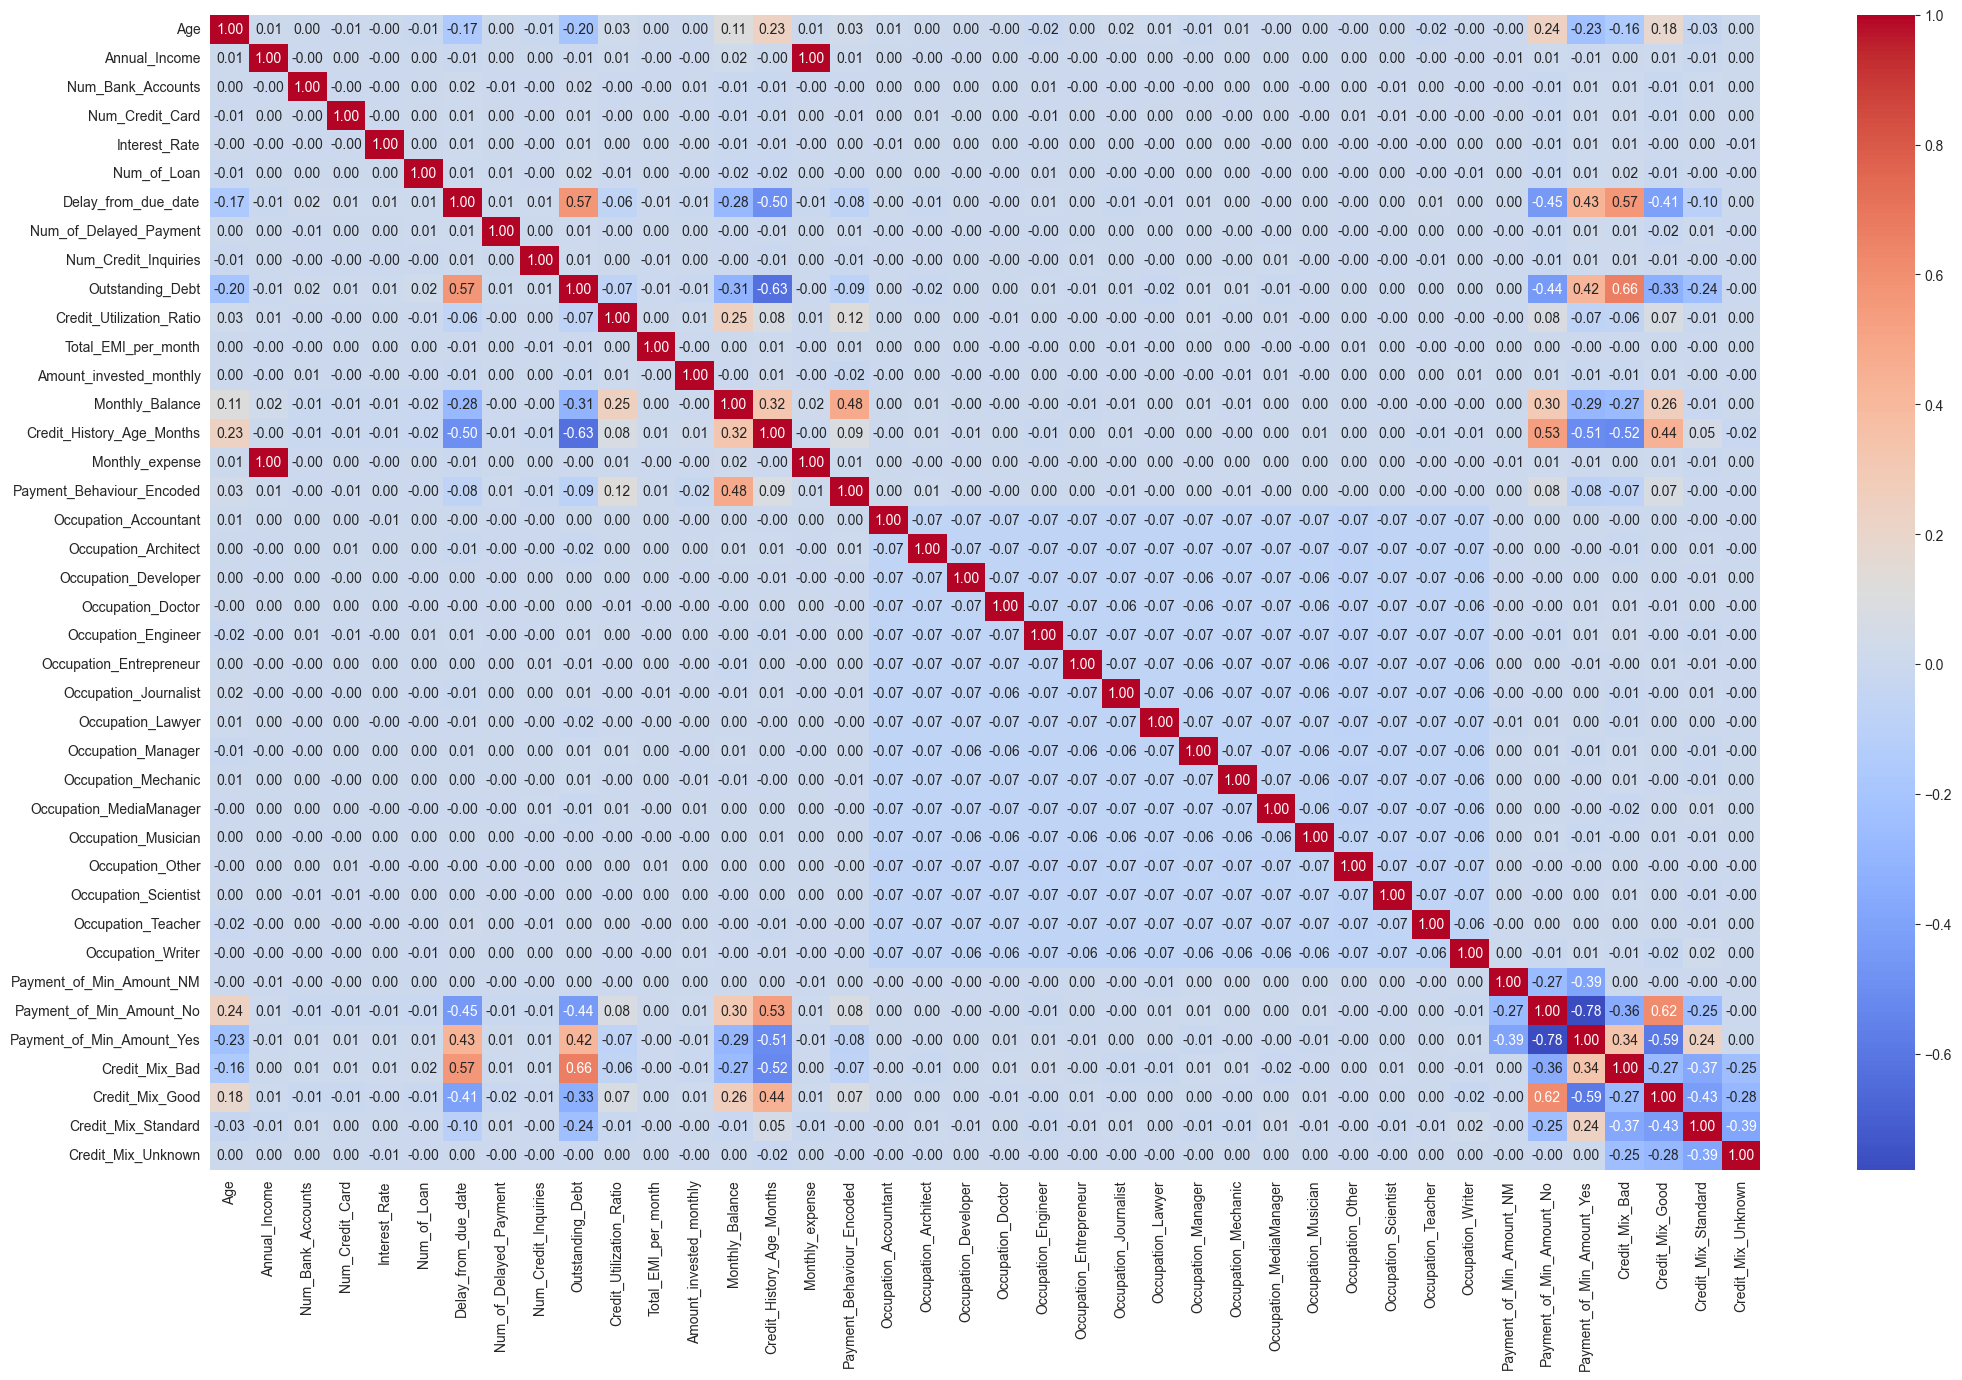

In [89]:
plt.figure(figsize=(25, 15))

sns.heatmap(X_train.corr(), annot = True, fmt='.2f', cmap= 'coolwarm');

## 3.4 MinMax Scaling

In [90]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [91]:
X_train.shape

(80287, 40)

In [92]:
X_train

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown
0,0.360,0.000,0.004,0.007,0.004,0.003,0.910,0.005,0.002,0.587,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1,0.140,0.005,0.004,0.003,0.003,0.003,0.224,0.005,0.000,0.028,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
2,0.186,0.005,0.003,0.580,0.002,0.001,0.403,0.004,0.000,0.048,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,0.267,0.000,0.005,0.006,0.003,0.003,0.373,0.006,0.003,0.765,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
4,0.279,0.003,0.004,0.007,0.004,0.004,0.343,0.005,0.004,0.329,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80282,0.047,0.000,0.003,0.003,0.004,0.003,0.104,0.003,0.005,0.490,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
80283,0.105,0.003,0.004,0.002,0.003,0.003,0.134,0.004,0.003,0.227,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
80284,0.128,0.002,0.002,0.002,0.003,0.005,0.478,0.004,0.004,0.338,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
80285,0.163,0.000,0.004,0.007,0.005,0.005,0.224,0.005,0.002,0.584,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000


In [93]:
X_test

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown
0,0.267,0.003,0.003,0.003,0.001,0.003,0.284,0.426,0.002,0.030,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.209,0.003,0.001,0.003,0.001,0.000,0.149,0.001,0.003,0.235,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2,0.093,0.001,0.002,0.003,0.001,0.001,0.075,0.003,0.001,0.049,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
3,0.186,0.001,0.002,0.005,0.001,0.002,0.418,0.004,0.067,0.198,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
4,0.105,0.005,0.003,0.004,0.001,0.001,0.104,0.002,0.001,0.168,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,0.291,0.001,0.004,0.004,0.002,0.001,0.403,0.003,0.001,0.079,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11994,0.128,0.000,0.004,0.005,0.006,0.006,0.567,0.005,0.003,0.550,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
11995,0.081,0.000,0.004,0.004,0.004,0.004,0.373,0.004,0.003,0.864,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
11996,0.128,0.001,0.004,0.002,0.001,0.001,0.358,0.004,0.002,0.065,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


# 4. Modeling

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [95]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


In [96]:
import tensorflow as tf

if tf.test.is_built_with_cuda():
    print("CUDA is available")
    print(f"CUDA version: {tf.sysconfig.get_build_info()['cuda_version']}")
    print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")
    print(f"GPU Name: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("CUDA is not available")

CUDA is not available


In [97]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

-------------------

In [98]:
model=Sequential()

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience= 40,mode="max",verbose=1)

history = model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=512,
          epochs=300,
          verbose=1,
          callbacks=[es])

Epoch 1/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5474 - loss: 0.9084 - val_accuracy: 0.6445 - val_loss: 0.7609
Epoch 2/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6276 - loss: 0.7797 - val_accuracy: 0.6500 - val_loss: 0.7441
Epoch 3/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.7627 - val_accuracy: 0.6480 - val_loss: 0.7328
Epoch 4/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7512 - val_accuracy: 0.6523 - val_loss: 0.7290
Epoch 5/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 0.7440 - val_accuracy: 0.6519 - val_loss: 0.7258
Epoch 6/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 0.7396 - val_accuracy: 0.6580 - val_loss: 0.7271
Epoch 7/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6524 - loss: 0.7388 - val_accuracy: 0.6566 - val_loss: 0.7262
Epoch 8/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6535 - loss: 0.7342 - val_accu

In [99]:
eval_metric(model, X_train, y_train, X_test, y_test)

2509/2509 ━━━━━━━━━━━━━━━━━━━━ 2s 585us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
Test Set:
[[2035 1154  323]
 [ 835 4493 1081]
 [  85  525 1467]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      3512
           1       0.73      0.70      0.71      6409
           2       0.51      0.71      0.59      2077

    accuracy                           0.67     11998
   macro avg       0.64      0.66      0.65     11998
weighted avg       0.68      0.67      0.67     11998


Train Set:
[[14239  7163  2099]
 [ 5324 30801  6759]
 [  512  3309 10081]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.65     23501
           1       0.75      0.72      0.73     42884
           2       0.53      0.73      0.61     13902

    accuracy                           0.69     80287
   macro avg       0.66      0.68      0.67     80287
weighted avg       0.70      0.69      0.69     80287



In [100]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,115 (402.80 KB)

 Trainable params: 34,371 (134.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,744 (268.54 KB)

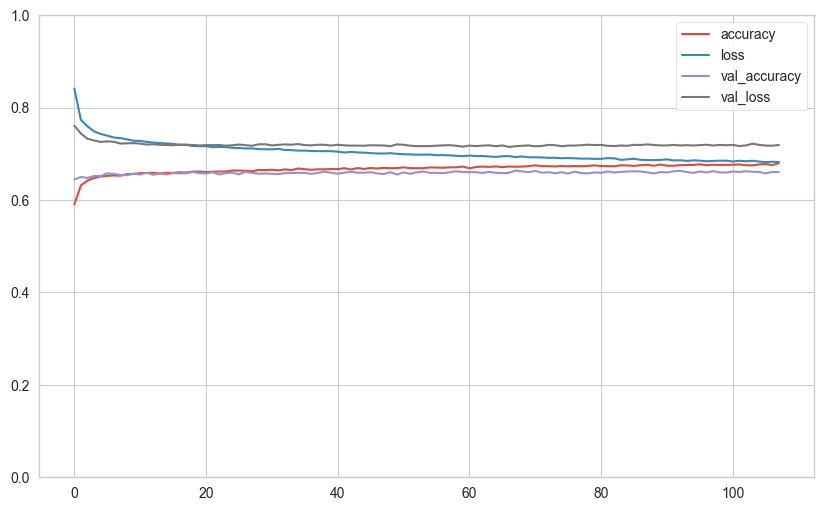

In [101]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

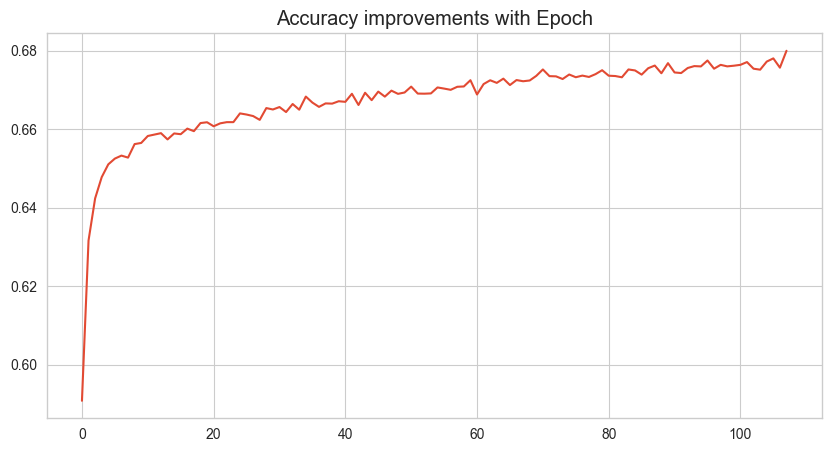

In [102]:
pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [103]:
# Function to compute feature importances using gradients
def compute_feature_importances(model, X):
    # Convert the input data to a TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    
    # Calculate gradients of the output with respect to the input features
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        predictions = model(X_tensor)
    gradients = tape.gradient(predictions, X_tensor)
    
    # Compute feature importances as the absolute sum of gradients
    feature_importances = np.abs(gradients.numpy()).mean(axis=0)
    
    return feature_importances

# Get the names of input features (replace 'feature_names' with actual names)
feature_names = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Months', 'Payment_Behaviour_Encoded',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Other', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Credit_Mix_Unknown']

# Compute feature importances for the test data
feature_importances = compute_feature_importances(model, X_test)

# Normalize feature importances to percentages
total_importance = np.sum(feature_importances)
feature_importances_percent = (feature_importances / total_importance) * 100

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': feature_importances_percent.round(2)  # Round to 2 decimal places for percentages
})

# Sort the DataFrame by Importance (%) in descending order
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), importance_df['Importance (%)'], tick_label=importance_df['Feature'])
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Display feature importances as percentages in a DataFrame
importance_df


ValueError: All arrays must be of the same length

--------------

## Modeling with class_weight

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
class_weights

In [ ]:
model = Sequential()

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer= opt, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

history = model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=512,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

In [ ]:
eval_metric(model, X_train, y_train, X_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

### SHAP

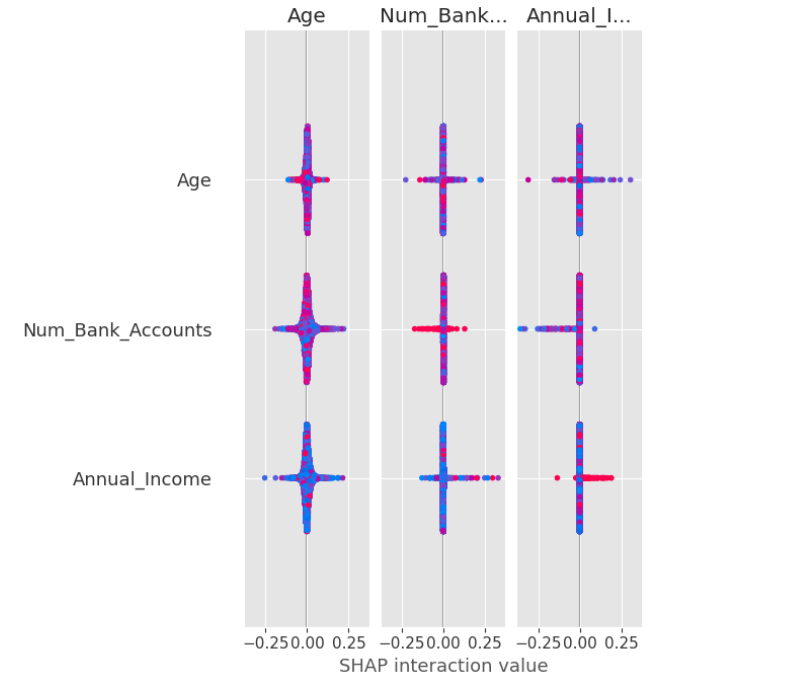

## Modeling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("X_train shape :", X_train_smote.shape)
print("y_train shape :", y_train_smote.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (128652, 39)
y_train shape : (128652,)
X_test shape : (11998, 39)
y_test shape : (11998,)


In [ ]:
model=Sequential()

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience=30,mode="auto",verbose=1)

history = model.fit(x=X_train_smote,
          y=y_train_smote,
          validation_data=(X_test, y_test),
          batch_size=512,
          epochs=300,
          verbose=1,
          callbacks=[es])

In [ ]:
eval_metric(model, X_train_smote, y_train_smote, X_test, y_test)

### with SMOTEENN

In [67]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
X_train_smtenn, y_train_smtenn = smoteenn.fit_resample(X_train, y_train)


print("X_train shape :", X_train_smtenn.shape)
print("y_train shape :", y_train_smtenn.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (72200, 39)
y_train shape : (72200,)
X_test shape : (11998, 39)
y_test shape : (11998,)


In [ ]:
model=Sequential()

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience=30,mode="auto",verbose=1)

history = model.fit(x=X_train_smtenn,
          y=y_train_smtenn,
          validation_split = .1,
          batch_size=512,
          epochs=300,
          verbose=1,
          callbacks=[es])

In [ ]:
eval_metric(model, X_train_smtenn, y_train_smtenn, X_test, y_test)

# 5. Other Machine Learning Models and comparisions

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Assuming X_train and y_train are already defined
# X_train, y_train = ...

# Train and evaluate models
results = {}
for name, model in models.items():
    # Perform cross-validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results[name] = cv_results
    print(f"{name}: Mean Accuracy = {cv_results.mean()}, Std = {cv_results.std()}")

# Compare model performance
print("\nModel Performance Comparison (Accuracy):")
for name, scores in results.items():
    print(f"{name}: Mean Accuracy = {scores.mean()}, Std = {scores.std()}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title("Model Performance Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Gradient Boosting: Mean Accuracy = 0.6958660512986131, Std = 0.00376164597182242


AttributeError: 'super' object has no attribute '__sklearn_tags__'

# 6. Final Model

I have seen that the first ANN(vanilla) model had better scores compared to the model with SMOTE and class_weight, so I will build my model with that..

In [ ]:
X.shape

In [ ]:
X

In [47]:
# encoding

order = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

ordinal_encoder = OrdinalEncoder(categories=[order])

X['Payment_Behaviour'] = ordinal_encoder.fit_transform(X[['Payment_Behaviour']])

#########################################################

onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas") 

encoded_features = onehot_encoder.fit_transform(X[['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']])

X = pd.concat([X, encoded_features], axis=1).drop(columns= ['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix'])

In [ ]:
X.columns

In [49]:
scaler = MinMaxScaler().fit(X)

In [50]:
import pickle
pickle.dump(scaler, open("scaler_credit_score", 'wb'))

In [51]:
X_scaled = scaler.transform(X)

In [ ]:
final_model =Sequential()

final_model.add(Dense(128, activation="relu"))
final_model.add(Dropout(0.2))
final_model.add(Dense(128, activation="relu"))
final_model.add(Dropout(0.3))
final_model.add(Dense(64, activation="relu"))
final_model.add(Dropout(0.2))
final_model.add(Dense(64, activation="relu"))
final_model.add(Dropout(0.2))
final_model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
final_model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = final_model.fit(x=X_scaled,
          y=y,
          batch_size=512,
          epochs=250,
          verbose=1)

In [53]:
final_model.save('final_model_ANN_creditscore.h5') 

# Predictions with test data

In [ ]:
test = pd.read_csv('/kaggle/input/credit-score-clean-dataset/Creditscore_test_cleaned.csv')
test

In [55]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

payment_behaviour_order = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

# Define preprocessing function for new data
def preprocess_new_data(new_data, ordinal_encoder, onehot_encoder, scaler):
    # Ordinal encoding for 'Payment_Behaviour'
    new_data['Payment_Behaviour'] = ordinal_encoder.transform(new_data[['Payment_Behaviour']])
    
    # One-hot encoding for 'Occupation', 'Payment_of_Min_Amount', 'Credit_Mix'
    encoded_features = onehot_encoder.transform(new_data[['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']])
    encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']))
    new_data = pd.concat([new_data, encoded_df], axis=1).drop(columns=['Occupation', 'Payment_of_Min_Amount', 'Credit_Mix'])
    
    # Min-max scaling for all numeric features
    new_data[new_data.columns] = scaler.transform(new_data[new_data.columns])
    
    return new_data


In [ ]:
# Apply preprocessing function to new data using fitted encoders and scaler
test_df = preprocess_new_data(test, ordinal_encoder, onehot_encoder, scaler)
test_df

In [ ]:
# Make predictions
probabilities = final_model.predict(test_df)
probabilities

In [ ]:
probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Class_0', 'Probability_Class_1', 'Probability_Class_2'])

# Display the DataFrame
probabilities_df

In [ ]:
predicted_labels = np.argmax(probabilities, axis=1)

# Display the predicted class labels
predicted_labels

In [ ]:
predictions_df = pd.DataFrame(predicted_labels, columns=['Predicted_Label'])

predictions_df

In [ ]:
# Concatenate predictions and probabilities DataFrames along the columns axis
pred_proba_df = pd.concat([probabilities_df, predictions_df], axis=1)

pred_proba_df


In [ ]:
pred_proba_df['Probability_Class_0'].mean()

In [ ]:
pred_proba_df['Probability_Class_1'].mean()

In [ ]:
pred_proba_df['Probability_Class_2'].mean()

In [ ]:
pred_proba_df['Predicted_Label'].value_counts()